In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [17]:
df=pd.read_csv('dataset/zomato.csv', encoding='latin-1')

Display first 5 rows

In [18]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Basic information

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [20]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [21]:
df.shape

(9551, 21)

# Check for missing values

In [22]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [23]:
df.duplicated().sum()

np.int64(0)

In [24]:
df['Country Code'].head()

0    162
1    162
2    162
3    162
4    162
Name: Country Code, dtype: int64

# Load country data and merge with main dataset

In [25]:
df_country=pd.read_excel('Dataset/Country-Code.xlsx')

In [26]:
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [27]:
final_df=pd.merge(df,df_country, on= 'Country Code', how='left')

Check final dataset structure

In [28]:
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [29]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [30]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

#EDA

## Country-wise restaurant count

In [31]:
final_df['Country'].value_counts()

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

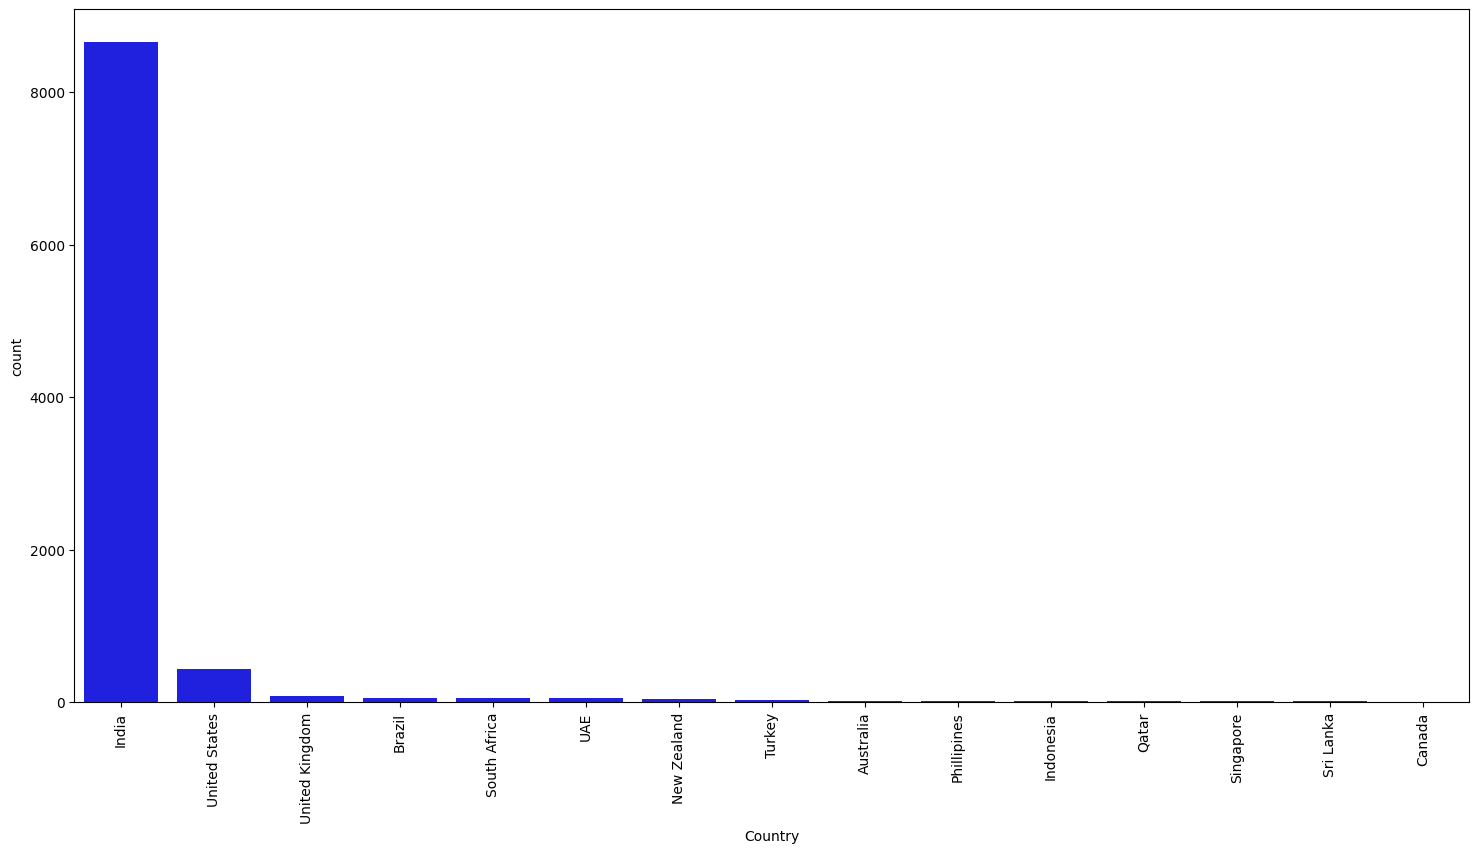

<Figure size 640x480 with 0 Axes>

In [32]:
plt.figure(figsize=(18,9))
sns.countplot(x='Country',data=final_df,order=final_df['Country'].value_counts().index,color='blue')
plt.xticks(rotation=90)
plt.show()
plt.savefig("plots/country_distribution.png")

India has most transaction

## Rating analysis

In [33]:
rating=final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'count'})

In [34]:
rating.head()

,Aggregate rating,Rating color,Rating text,count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


In [35]:
rating.columns

Index(['Aggregate rating', 'Rating color', 'Rating text', 'count'], dtype='object')

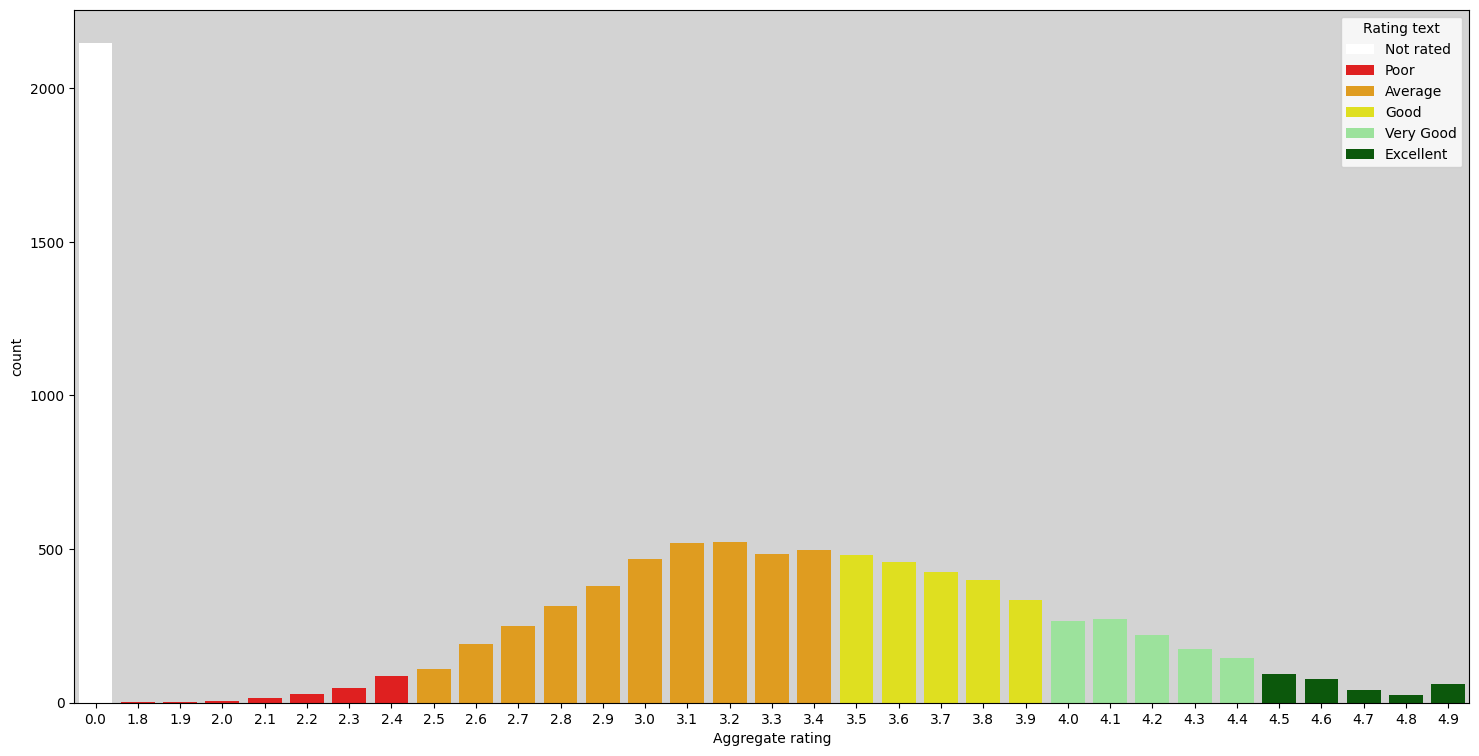

<Figure size 640x480 with 0 Axes>

In [36]:
plt.figure(figsize=(18,9))
ax=sns.barplot(x= 'Aggregate rating', y='count', data=rating, hue='Rating text', palette=['White','Red','Orange','Yellow','lightGreen','Darkgreen'])
ax.set_facecolor('lightgrey')
plt.show()
plt.savefig("plots/rating_distribution.png")

max rating between 2.5 to 3.4 ie average

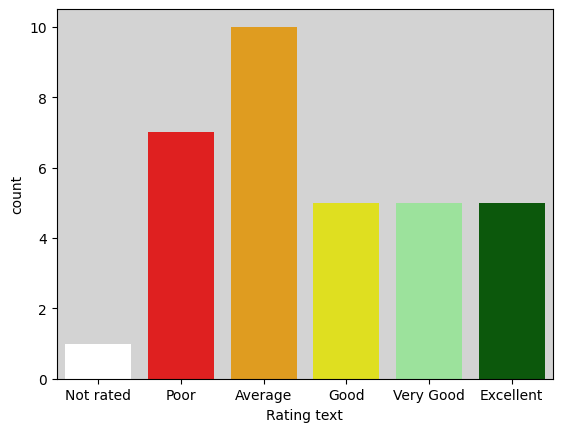

<Figure size 640x480 with 0 Axes>

In [37]:
ax=sns.countplot(x='Rating text',hue='Rating text', data=rating, palette=['White','Red','Orange','Yellow','lightGreen','Darkgreen'])
ax.set_facecolor('lightgrey')
plt.show()
plt.savefig("plots/rating_text_distribution.png")

## Check distribution of "Not rated" restaurants

In [38]:
final_df[final_df['Rating text']=='Not rated'].groupby(['Aggregate rating', 'Rating text', 'Country']).size().reset_index().rename(columns={0:'count'})

,Aggregate rating,Rating text,Country,count
0,0.0,Not rated,Brazil,5
1,0.0,Not rated,India,2139
2,0.0,Not rated,United Kingdom,1
3,0.0,Not rated,United States,3


## Currency used in each country

In [39]:
final_df[['Country','Currency']].groupby(['Country','Currency']).size()

Country         Currency              
Australia       Dollar($)                   24
Brazil          Brazilian Real(R$)          60
Canada          Dollar($)                    4
India           Indian Rupees(Rs.)        8652
Indonesia       Indonesian Rupiah(IDR)      21
New Zealand     NewZealand($)               40
Phillipines     Botswana Pula(P)            22
Qatar           Qatari Rial(QR)             20
Singapore       Dollar($)                   20
South Africa    Rand(R)                     60
Sri Lanka       Sri Lankan Rupee(LKR)       20
Turkey          Turkish Lira(TL)            34
UAE             Emirati Diram(AED)          60
United Kingdom  Pounds(£)                  80
United States   Dollar($)                  434
dtype: int64

## Availability of online delivery , table booking & Is delivering now

In [40]:
final_df[['Has Online delivery', 'Has Table booking', 'Country','Is delivering now']].groupby(['Has Online delivery', 'Has Table booking','Is delivering now', 'Country']).size()

Has Online delivery  Has Table booking  Is delivering now  Country       
No                   No                 No                 Australia           24
                                                           Brazil              60
                                                           Canada               4
                                                           India             5545
                                                           Indonesia           21
                                                           New Zealand         40
                                                           Phillipines          8
                                                           Qatar               19
                                                           Singapore           20
                                                           South Africa        58
                                                           Sri Lanka           20
                        

In [41]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

## Top 5 cities

In [42]:
city_values=final_df['City'].value_counts().values
city_labels=final_df['City'].value_counts().index

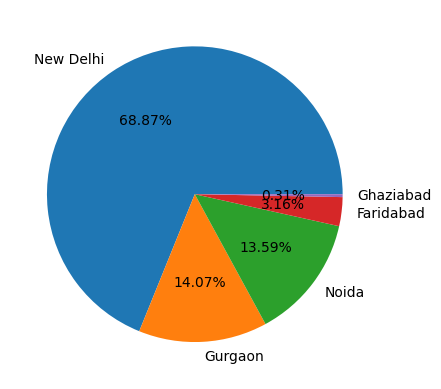

<Figure size 640x480 with 0 Axes>

In [43]:
plt.pie(city_values[:5], labels=city_labels[:5], autopct='%.2f%%')
plt.show()
plt.savefig("plots/top_5_cities.png")

In [44]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

## Top 10 Cuisines

In [45]:
Cuisines=final_df['Cuisines'].value_counts().values
Cuisines_labels=final_df['Cuisines'].value_counts().index

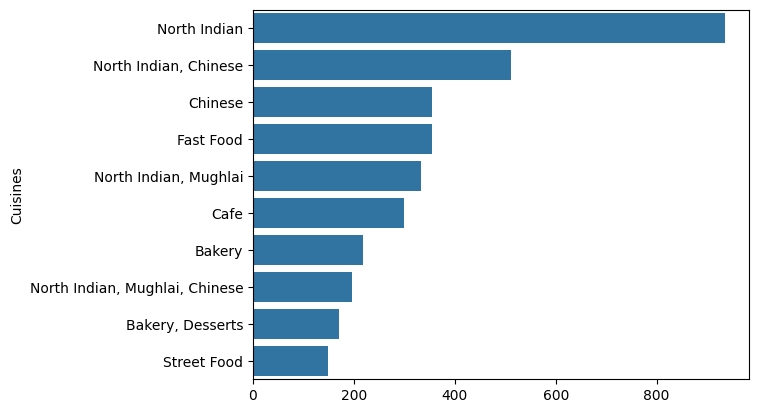

<Figure size 640x480 with 0 Axes>

In [46]:
sns.barplot(x=Cuisines[:10], y=Cuisines_labels[:10])
plt.show()
plt.savefig("plots/top_cuisines.png")

In [47]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

##Cost Analysis (Average Cost for Two People by Country)

In [48]:
final_df[['Average Cost for two','Country']].groupby(['Country']).mean()

,Average Cost for two
Country,
Australia,24.083333
Brazil,134.666667
Canada,36.250000
India,623.370319
Indonesia,281190.476190
New Zealand,69.750000
Phillipines,1606.818182
Qatar,223.750000
Singapore,155.750000


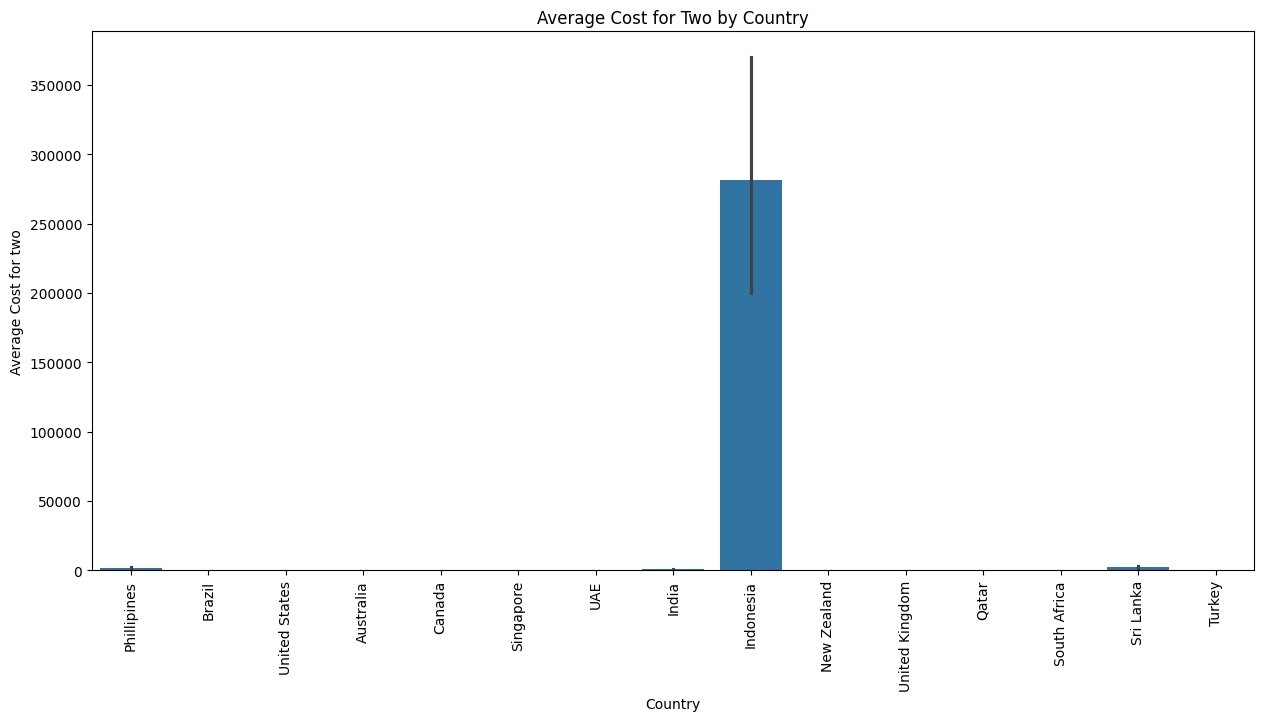

<Figure size 640x480 with 0 Axes>

In [49]:
plt.figure(figsize=(15,7))
sns.barplot(x=final_df['Country'], y=final_df['Average Cost for two'])
plt.xticks(rotation=90)
plt.title("Average Cost for Two by Country")
plt.show()
plt.savefig("plots/cost_vs_country.png")

##Top 10 Most Popular Restaurant Chains

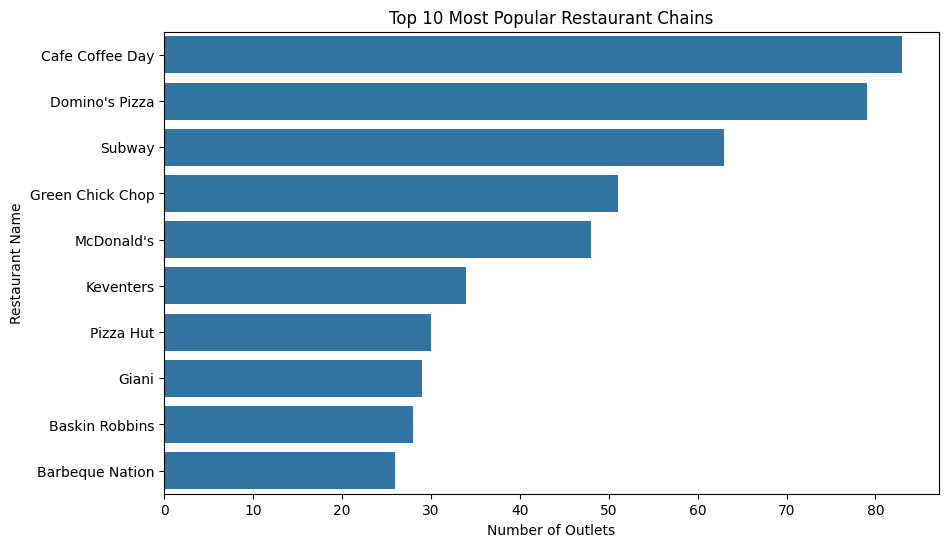

<Figure size 640x480 with 0 Axes>

In [50]:
plt.figure(figsize=(10,6))
top_restaurants = final_df['Restaurant Name'].value_counts().head(10)
sns.barplot(y=top_restaurants.index, x=top_restaurants.values)
plt.title("Top 10 Most Popular Restaurant Chains")
plt.xlabel("Number of Outlets")
plt.show()
plt.savefig("plots/popular_restaurant.png")

##Restaurant Availability by Price Range

In [51]:
df['Price range'].unique()

array([3, 4, 2, 1])

C:\Users\nikhi\AppData\Local\Temp\ipykernel_5108\39154155.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price range', y='Aggregate rating', data=final_df, palette='viridis')


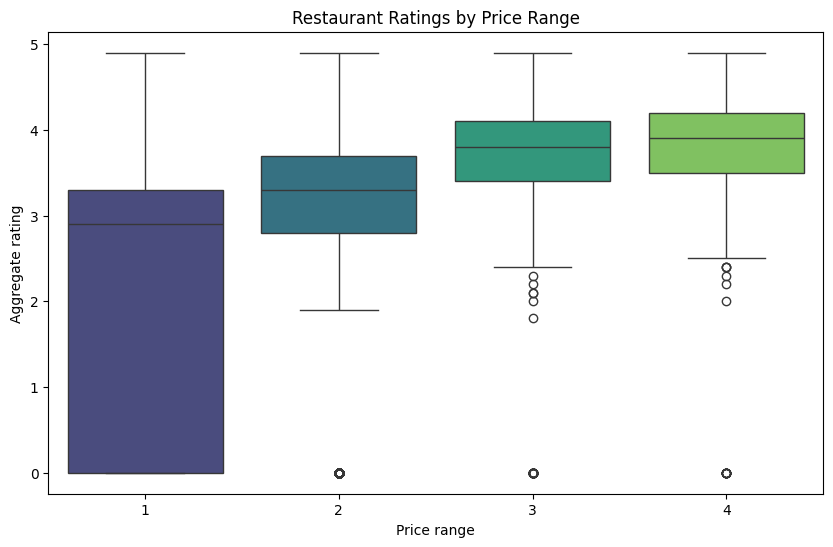

<Figure size 640x480 with 0 Axes>

In [52]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Price range', y='Aggregate rating', data=final_df, palette='viridis')
plt.title("Restaurant Ratings by Price Range")
plt.show()
plt.savefig("plots/price_range_analysis.png")